In [ ]:
import pandas as pd

In [ ]:
!pip install koreanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 13.9 MB/s eta 0:00:00


In [ ]:
import koreanize_matplotlib

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sales_1 = pd.read_excel('/content/1. 스마트스토어_판매성과_2022-01-01_2022-06-30.xlsx')
sales_2 = pd.read_excel('/content/1. 스마트스토어_판매성과_2022-07-01_2022-12-31.xlsx')
sales_3 = pd.read_excel('/content/1. 스마트스토어_판매성과_2023-01-01_2023-05-31.xlsx')

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [ ]:
sales_df = pd.concat([sales_1, sales_2, sales_3])

In [ ]:
# '날짜' 컬럼을 datetime 형식으로 변환
sales_df['날짜'] = pd.to_datetime(sales_df['날짜'])

# 날짜를 기준으로 오름차순으로 데이터를 정렬
sales_df.sort_values(by='날짜', inplace=True)

sales_df


,날짜,요일,시간대,결제자수,결제수,모바일비율(결제건수),결제금액,모바일비율(결제금액),결제당 결제금액,결제상품수량,결제당 상품수량,배송비,쿠폰합계,상품쿠폰,주문쿠폰,환불건수,환불금액,환불비율(결제금액),환불수량,환불비율(결제상품수량)
735,2022-01-01,토,20시,1,2,1.0,30000,1.0,15000.0,2,1.0,3500,0,0,0,0,0,0.0,0,0.0
732,2022-01-02,일,14시,1,1,1.0,200000,1.0,200000.0,8,8.0,0,0,0,0,0,0,0.0,0,0.0
734,2022-01-02,일,23시,1,1,1.0,36000,1.0,36000.0,2,2.0,3500,0,0,0,0,0,0.0,0,0.0
733,2022-01-02,일,17시,1,1,0.0,192500,0.0,192500.0,7,7.0,0,0,0,0,0,0,0.0,0,0.0
731,2022-01-03,월,18시,1,1,1.0,30000,1.0,30000.0,2,2.0,3500,0,0,0,0,0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2023-05-31,수,15시,1,1,1.0,36000,1.0,36000.0,1,1.0,3000,0,0,0,0,0,0.0,0,0.0
2,2023-05-31,수,23시,1,2,1.0,45000,1.0,22500.0,2,1.0,0,1000,1000,0,0,0,0.0,0,0.0
3,2023-05-31,수,14시,1,2,1.0,43000,1.0,21500.0,2,1.0,0,1000,1000,0,0,0,0.0,0,0.0
1,2023-05-31,수,11시,1,2,1.0,45000,1.0,22500.0,2,1.0,0,1000,1000,0,0,0,0.0,0,0.0


In [ ]:
sales_df['결제금액'] = sales_df['결제금액'] - sales_df['환불금액']

sales_df.loc[(sales_df['결제금액'].isnull() | (sales_df['결제금액'] == 0)) & (sales_df['환불금액'] > 0), '결제금액'] = 0

In [ ]:
sales_df

,날짜,요일,시간대,결제자수,결제수,모바일비율(결제건수),결제금액,모바일비율(결제금액),결제당 결제금액,결제상품수량,결제당 상품수량,배송비,쿠폰합계,상품쿠폰,주문쿠폰,환불건수,환불금액,환불비율(결제금액),환불수량,환불비율(결제상품수량)
735,2022-01-01,토,20시,1,2,1.0,30000,1.0,15000.0,2,1.0,3500,0,0,0,0,0,0.0,0,0.0
732,2022-01-02,일,14시,1,1,1.0,200000,1.0,200000.0,8,8.0,0,0,0,0,0,0,0.0,0,0.0
734,2022-01-02,일,23시,1,1,1.0,36000,1.0,36000.0,2,2.0,3500,0,0,0,0,0,0.0,0,0.0
733,2022-01-02,일,17시,1,1,0.0,192500,0.0,192500.0,7,7.0,0,0,0,0,0,0,0.0,0,0.0
731,2022-01-03,월,18시,1,1,1.0,30000,1.0,30000.0,2,2.0,3500,0,0,0,0,0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2023-05-31,수,15시,1,1,1.0,36000,1.0,36000.0,1,1.0,3000,0,0,0,0,0,0.0,0,0.0
2,2023-05-31,수,23시,1,2,1.0,45000,1.0,22500.0,2,1.0,0,1000,1000,0,0,0,0.0,0,0.0
3,2023-05-31,수,14시,1,2,1.0,43000,1.0,21500.0,2,1.0,0,1000,1000,0,0,0,0.0,0,0.0
1,2023-05-31,수,11시,1,2,1.0,45000,1.0,22500.0,2,1.0,0,1000,1000,0,0,0,0.0,0,0.0


In [ ]:
sales_df.describe()

,결제자수,결제수,모바일비율(결제건수),결제금액,모바일비율(결제금액),결제당 결제금액,결제상품수량,결제당 상품수량,배송비,쿠폰합계,상품쿠폰,주문쿠폰,환불건수,환불금액,환불비율(결제금액),환불수량,환불비율(결제상품수량)
count,2490.000000,2490.000000,2440.000000,2.490000e+03,2440.000000,2.440000e+03,2490.000000,2440.000000,2490.000000,2490.000000,2490.000000,2490.0,2490.000000,2.490000e+03,2440.000000,2490.000000,2440.000000
mean,1.244578,1.742972,0.816435,8.267245e+04,0.814746,5.105177e+04,3.225301,1.917707,2147.791165,153.413655,153.413655,0.0,0.093574,3.959036e+03,0.031917,0.141365,0.032095
std,1.217928,1.602467,0.369800,1.917391e+05,0.372960,7.448435e+04,5.874631,2.629555,2417.261885,434.267408,434.267408,0.0,0.387219,2.725808e+04,0.174091,0.922083,0.176939
min,0.000000,0.000000,0.000000,-2.200000e+05,0.000000,7.000000e+03,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,3.200000e+04,1.000000,2.000000e+04,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,4.500000e+04,1.000000,3.200000e+04,2.000000,1.000000,3000.000000,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000
75%,1.000000,2.000000,1.000000,8.250000e+04,1.000000,4.562500e+04,3.000000,2.000000,3500.000000,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000
max,49.000000,54.000000,1.000000,5.186000e+06,1.000000,1.375000e+06,72.000000,50.000000,51000.000000,6000.000000,6000.000000,0.0,5.000000,1.072500e+06,3.625000,36.000000,3.000000


In [ ]:
average_payment = sales_df['결제금액'].mean()
print(f"결제금액의 평균: {average_payment:.2f}")

결제금액의 평균: 82672.45


# 머신러닝2

In [ ]:
from prophet import Prophet

# Prophet 모델을 초기화합니다.
model = Prophet()

# seasonality를 추가합니다. (주기적인 패턴을 반영합니다.)
model.add_seasonality(name='monthly', period=30.5, fourier_order=5)

# 'ds'와 'y' 컬럼으로 DataFrame을 변환합니다. (Prophet 모델에 맞는 컬럼명으로 변경해야 합니다.)
sales_df.rename(columns={'날짜': 'ds', '결제금액': 'y'}, inplace=True)

# 모델을 학습합니다.
model.fit(sales_df)

# 미래의 날짜를 생성합니다. (예측 기간 설정)
future = model.make_future_dataframe(periods=8, freq='M')  # 23년 12월까지 12개월의 날짜를 생성합니다.

# 미래의 결제금액을 예측합니다.
forecast = model.predict(future)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvh11a1c7/0hw_1qb9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvh11a1c7/w0uoy44w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=864', 'data', 'file=/tmp/tmpvh11a1c7/0hw_1qb9.json', 'init=/tmp/tmpvh11a1c7/w0uoy44w.json', 'output', 'file=/tmp/tmpvh11a1c7/prophet_model72gk2ja8/prophet_model-20230727064330.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:43:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:43:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,monthly,monthly_lower,monthly_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-01-01,80944.125200,-90194.580049,356156.905580,80944.125200,80944.125200,43972.979074,43972.979074,43972.979074,26621.987472,26621.987472,26621.987472,17350.991601,17350.991601,17350.991601,0.0,0.0,0.0,124917.104274
1,2022-01-02,81102.804716,-114376.279354,380596.157616,81102.804716,81102.804716,52199.119868,52199.119868,52199.119868,5214.710432,5214.710432,5214.710432,46984.409436,46984.409436,46984.409436,0.0,0.0,0.0,133301.924584
2,2022-01-03,81261.484232,-159762.465197,304907.853618,81261.484232,81261.484232,-26392.829382,-26392.829382,-26392.829382,-12862.797636,-12862.797636,-12862.797636,-13530.031746,-13530.031746,-13530.031746,0.0,0.0,0.0,54868.654850
3,2022-01-04,81420.163748,-204703.652780,283722.958116,81420.163748,81420.163748,-41873.611553,-41873.611553,-41873.611553,-15591.321427,-15591.321427,-15591.321427,-26282.290126,-26282.290126,-26282.290126,0.0,0.0,0.0,39546.552195
4,2022-01-05,81578.843264,-183313.539984,294503.066671,81578.843264,81578.843264,-19643.511162,-19643.511162,-19643.511162,-3742.223194,-3742.223194,-3742.223194,-15901.287967,-15901.287967,-15901.287967,0.0,0.0,0.0,61935.332103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,2023-09-30,55839.943307,-181243.660681,308578.761341,46003.545936,65122.013048,13392.055872,13392.055872,13392.055872,-3958.935729,-3958.935729,-3958.935729,17350.991601,17350.991601,17350.991601,0.0,0.0,0.0,69231.999179
508,2023-10-31,56094.606516,-211890.686469,259475.594588,42499.304261,69636.151072,-19607.746448,-19607.746448,-19607.746448,6674.543678,6674.543678,6674.543678,-26282.290126,-26282.290126,-26282.290126,0.0,0.0,0.0,36486.860068
509,2023-11-30,56341.054784,-180195.859621,293435.599504,38727.423713,74859.028402,840.136811,840.136811,840.136811,-3958.935729,-3958.935729,-3958.935729,4799.072540,4799.072540,4799.072540,0.0,0.0,0.0,57181.191595
510,2023-12-31,56595.717994,-133794.722815,339193.423165,34183.945300,80352.897568,53658.953113,53658.953113,53658.953113,6674.543678,6674.543678,6674.543678,46984.409436,46984.409436,46984.409436,0.0,0.0,0.0,110254.671107


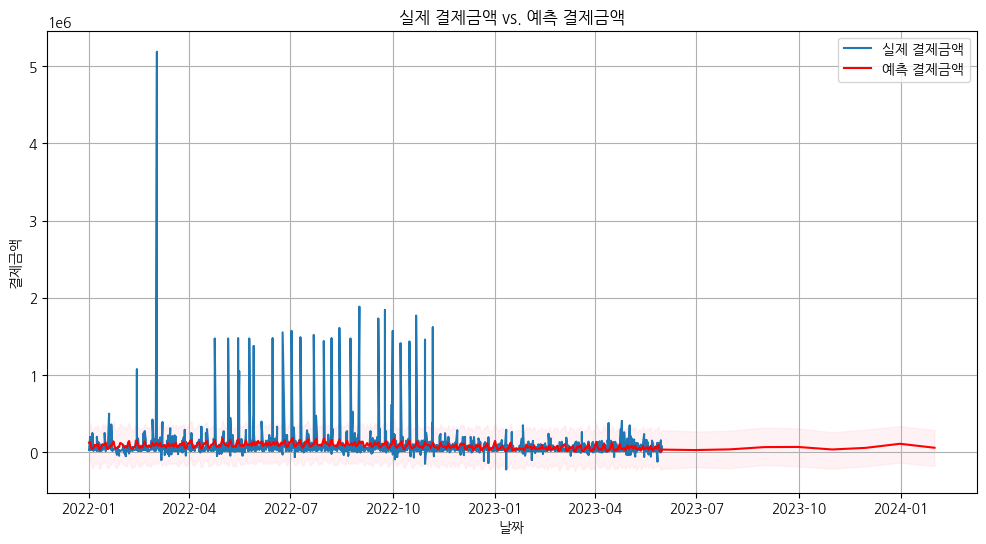

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Prophet 모델의 예측 결과(forecast)에서 필요한 컬럼만 선택합니다.
forecast_df = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

# 실제 데이터와 예측 결과를 하나의 데이터프레임으로 합칩니다.
merged_df = pd.merge(sales_df, forecast_df, on='ds', how='outer')

# 날짜(ds) 컬럼을 인덱스로 설정합니다.
merged_df.set_index('ds', inplace=True)

# 그래프를 그립니다.
plt.figure(figsize=(12, 6))
plt.plot(merged_df.index, merged_df['y'], label='실제 결제금액')
plt.plot(merged_df.index, merged_df['yhat'], label='예측 결제금액', color='red')
plt.fill_between(merged_df.index, merged_df['yhat_lower'], merged_df['yhat_upper'], color='pink', alpha=0.2)
plt.xlabel('날짜')
plt.ylabel('결제금액')
plt.title('실제 결제금액 vs. 예측 결제금액')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2490 entries, 735 to 5
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ds            2490 non-null   datetime64[ns]
 1   요일            2490 non-null   object        
 2   시간대           2490 non-null   object        
 3   결제자수          2490 non-null   int64         
 4   결제수           2490 non-null   int64         
 5   모바일비율(결제건수)   2440 non-null   float64       
 6   y             2490 non-null   int64         
 7   모바일비율(결제금액)   2440 non-null   float64       
 8   결제당 결제금액      2440 non-null   float64       
 9   결제상품수량        2490 non-null   int64         
 10  결제당 상품수량      2440 non-null   float64       
 11  배송비           2490 non-null   int64         
 12  쿠폰합계          2490 non-null   int64         
 13  상품쿠폰          2490 non-null   int64         
 14  주문쿠폰          2490 non-null   int64         
 15  환불건수          2490 non-null   int64    

# 월별

In [ ]:
# 월별로 그룹화하고 결제금액을 합산
monthly_payment_sum = sales_df.groupby(sales_df['날짜'].dt.to_period('M'))['결제금액'].sum()
monthly_payment_sum

날짜
2022-01     5380000
2022-02     6460000
2022-03    20078000
2022-04     9392000
2022-05    17562500
2022-06    12248500
2022-07    17426000
2022-08    17597000
2022-09    16110500
2022-10    19654500
2022-11    10935500
2022-12     8203000
2023-01     6727400
2023-02     5990000
2023-03     8342500
2023-04    11259000
2023-05    12488000
Freq: M, Name: 결제금액, dtype: int64

In [ ]:
# 월별 결제금액 합계를 DataFrame으로 변환
monthly_payment_df = monthly_payment_sum.to_frame(name='월별 결제금액 합계')

monthly_payment_df


,월별 결제금액 합계
날짜,
2022-01,5380000
2022-02,6460000
2022-03,20078000
2022-04,9392000
2022-05,17562500
2022-06,12248500
2022-07,17426000
2022-08,17597000
2022-09,16110500


In [ ]:
# 2022년 1월을 제외한 전체합계 계산
total_sum = monthly_payment_df[1:]['월별 결제금액 합계'].sum()

print("전체 합계:", total_sum)

전체 합계: 190709400


In [ ]:
monthly_payment_df.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 17 entries, 2022-01 to 2023-05
Freq: M
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   월별 결제금액 합계  17 non-null     int64
dtypes: int64(1)
memory usage: 272.0 bytes


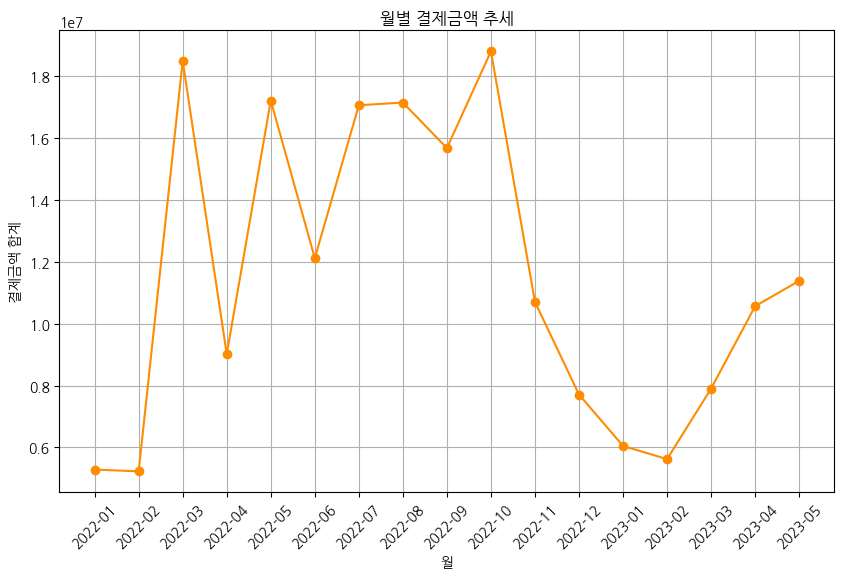

In [ ]:
# 월별 결제금액 합계 데이터를 문자열로 변환
monthly_payment_df['월별'] = monthly_payment_df.index.astype(str)

# 그래프를 그리기 위해 시각화 설정
plt.figure(figsize=(10, 6))
plt.plot(monthly_payment_df['월별'], monthly_payment_df['월별 결제금액 합계'], marker='o', linestyle='-', color='darkorange')
plt.xlabel('월')
plt.ylabel('결제금액 합계')
plt.title('월별 결제금액 추세')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [ ]:
# '날짜' 컬럼에서 월(month)이 4이고, 연도(year)가 2022인 데이터
sales_df_202203 = sales_df[(sales_df['날짜'].dt.month == 3) & (sales_df['날짜'].dt.year == 2022)]


sales_df_202203

In [ ]:
# '결제수' 컬럼의 총합 계산
total_payments = sales_df_202203['결제수'].sum()

# '환불건수' 컬럼의 총합 계산
total_refunds = sales_df_202203['환불건수'].sum()

print("결제수의 총합:", total_payments)
print("환불건수의 총합:", total_refunds)


결제수의 총합: 443
환불건수의 총합: 31


In [ ]:
# '날짜' 컬럼에서 월(month)이 4이고, 연도(year)가 2022인 데이터만 가져옵니다.
sales_df_202303 = sales_df[(sales_df['날짜'].dt.month == 3) & (sales_df['날짜'].dt.year == 2023)]

sales_df_202303

In [ ]:
# '결제수' 컬럼의 총합 계산
total_payments = sales_df_202303['결제수'].sum()

# '환불건수' 컬럼의 총합 계산
total_refunds = sales_df_202303['환불건수'].sum()

print("결제수의 총합:", total_payments)
print("환불건수의 총합:", total_refunds)

결제수의 총합: 316
환불건수의 총합: 14


# 요일

In [ ]:
# 요일별로 그룹화하고 결제수의 합계를 계산
grouped_요일 = sales_df.groupby('요일')['결제수'].sum()

grouped_요일 = grouped_요일.sort_values(ascending=False)

grouped_요일

요일
월    786
일    694
목    693
화    665
수    612
금    446
토    444
Name: 결제수, dtype: int64

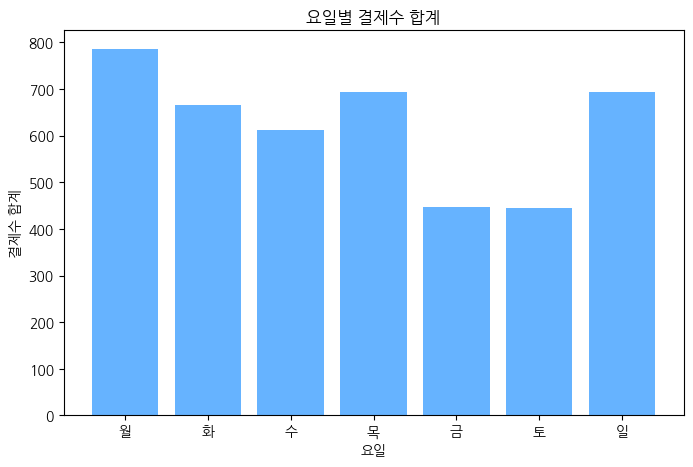

In [ ]:
weekday_order = ['월', '화', '수', '목', '금', '토', '일']
grouped_요일 = grouped_요일.reindex(weekday_order)

plt.figure(figsize=(8, 5))
plt.bar(grouped_요일.index, grouped_요일.values, color='#66b3ff')

plt.xlabel('요일')
plt.ylabel('결제수 합계')
plt.title('요일별 결제수 합계')

plt.show()


# 시간대

In [ ]:
# 시간대별로 그룹화하고 결제수의 합계를 계산
grouped_시간대 = sales_df.groupby('시간대')['결제수'].sum()

# 결제수의 합계를 내림차순으로 정렬
grouped_시간대 = grouped_시간대.sort_values(ascending=False)

print(grouped_시간대)


시간대
11시    394
10시    385
13시    381
12시    303
14시    263
09시    261
16시    256
15시    250
17시    226
23시    195
20시    188
22시    185
21시    183
08시    172
19시    162
18시    158
00시    103
07시     93
01시     74
06시     44
02시     24
05시     18
03시     15
04시      7
Name: 결제수, dtype: int64


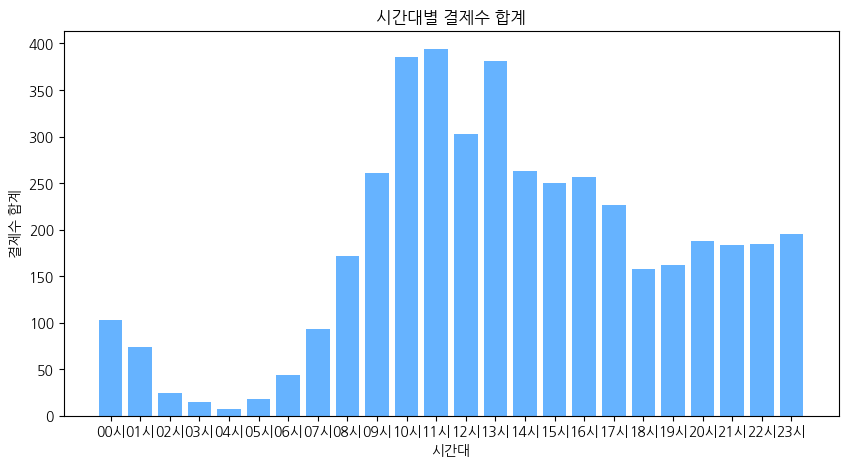

In [ ]:
import matplotlib.pyplot as plt

# 시간대별로 그룹화하고 결제수의 합계를 계산
grouped_시간대 = sales_df.groupby('시간대')['결제수'].sum()

# 시간대를 정렬
ordered_시간대 = ['00시', '01시', '02시', '03시', '04시', '05시', '06시', '07시', '08시', '09시', '10시', '11시',
                  '12시', '13시', '14시', '15시', '16시', '17시', '18시', '19시', '20시', '21시', '22시', '23시']
grouped_시간대 = grouped_시간대.reindex(ordered_시간대)

plt.figure(figsize=(10, 5))
plt.bar(grouped_시간대.index, grouped_시간대.values, color='#66b3ff')

plt.xlabel('시간대')
plt.ylabel('결제수 합계')
plt.title('시간대별 결제수 합계')

plt.show()
